In [1]:
# Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Cargamos las URLs de los datos de educación
url_Children_out_of_school = 'https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/Children%20out%20of%20school%20(%25%20of%20primary%20school%20age).csv'
url_Gov_expenditure_education = 'https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/Government%20expenditure%20on%20education%2C%20total%20(%25%20of%20GDP).csv'
url_Literacy_adult_rate = 'https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/Literacy%20rate%2C%20adult%20total%20(%25%20of%20people%20ages%2015%20and%20above).csv'
url_Primary_comp_rate = 'https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/Primary%20completion%20rate%2C%20total%20(%25%20of%20relevant%20age%20group).csv'
url_pupil_teacher_ratio = 'https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/Pupil-teacher%20ratio%2C%20primary.csv'

In [3]:
# Cargamos las URLs de los Metadatos
url_metadata = 'https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/Metadata_Country.csv'

In [4]:
# Cargamos los datos de las variables de educacion
Children_out_of_school = pd.read_csv(url_Children_out_of_school, skiprows=[0,1,2,3] , header=0 ,index_col=False) 
Gov_expenditure_education = pd.read_csv(url_Gov_expenditure_education, skiprows=[0,1,2,3] , header=0 ,index_col=False) 
Literacy_adult_rate = pd.read_csv(url_Literacy_adult_rate, skiprows=[0,1,2,3] , header=0 ,index_col=False) 
Primary_comp_rate = pd.read_csv(url_Primary_comp_rate, skiprows=[0,1,2,3] , header=0 ,index_col=False) 
pupil_teacher_ratio = pd.read_csv(url_pupil_teacher_ratio, skiprows=[0,1,2,3] , header=0 ,index_col=False) 

In [5]:
# Cargamos la URL y los datos de Mortalidad
url_Mortalidad_infant = 'https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/Mortality_rate_infant.csv'
Mortalidad_infant = pd.read_csv(url_Mortalidad_infant, skiprows=[0,1,2,3], header = 0 , index_col = False)


In [6]:
# Cargamos la Metadata
metadata = pd.read_csv(url_metadata, header=0 ,index_col=False) 
metadata = metadata.drop(['Country Code','SpecialNotes','Unnamed: 5'],axis = 1)
metadata.columns = ['region', 'income', 'country']
metadata    # Mostramos 

,region,income,country
0,Latin America & Caribbean,High income,Aruba
1,NaN,NaN,Africa Eastern and Southern
2,South Asia,Low income,Afghanistan
3,NaN,NaN,Africa Western and Central
4,Sub-Saharan Africa,Lower middle income,Angola
...,...,...,...
260,Europe & Central Asia,Upper middle income,Kosovo
261,Middle East & North Africa,Low income,"Yemen, Rep."
262,Sub-Saharan Africa,Upper middle income,South Africa
263,Sub-Saharan Africa,Low income,Zambia


In [7]:
# Creamos una lista con las variables de educacion 
tables = [Children_out_of_school, Gov_expenditure_education,
                   Literacy_adult_rate,Primary_comp_rate,pupil_teacher_ratio  , Mortalidad_infant]
# Concatenamos las tablas
education = pd.concat(tables , axis = 0)

In [8]:
# Luego de obtener la tabla concatenada de educacion, se eligen las columnas con las que se van a trabajar 
education = education[['Country Name', 'Indicator Name', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']]
education.head()

,Country Name,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,Children out of school (% of primary school age),1.60268,0.32258,1.81634,3.32156,2.17652,1.64077,0.96918,0.81243,...,NaN,NaN,0.07791,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,Children out of school (% of primary school age),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Children out of school (% of primary school age),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,Children out of school (% of primary school age),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,Children out of school (% of primary school age),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
education.shape

(1596, 24)

In [10]:
# Llamamos la funcion .melt, la cual nos permite cambiar la estructura de nuestro dataframe de un formato ancho a uno largo. 
# Primero seleccionamos las columnas a las que no queremos hacerle melt usando el parámetro id_vars ('Country Name','Indicator Name') 
# y también a la única columna que quiero aplicar el melt, en este caso 'Year'con la propiedad value_vars en este caso var_name. 
# Luego utilizo un set_index para fijar las columnas como índices. 
# Despues llamamos las funciones:  
# .squeeze() para eliminar las entradas unidimensionales de la forma de una matriz;  
# .unstack() para convertir las columnas de datos en filas; 
# .reset_index() para reestablecer el indice antiguo por el indice que predeterminamos. 
# Finalmente, visualizamos la nueva estructura del dataframe.
    
df = ((education.melt(id_vars=['Country Name','Indicator Name'],var_name='Year'))
   .set_index(['Country Name','Year','Indicator Name'])
   .squeeze()
   .unstack()
   .reset_index())
df 

Indicator Name,Country Name,Year,Children out of school (% of primary school age),"Government expenditure on education, total (% of GDP)","Literacy rate, adult total (% of people ages 15 and above)","Mortality rate, infant (per 1,000 live births)","Primary completion rate, total (% of relevant age group)","Pupil-teacher ratio, primary"
0,Afghanistan,2000,NaN,NaN,NaN,90.5,NaN,NaN
1,Afghanistan,2001,NaN,NaN,NaN,87.9,NaN,NaN
2,Afghanistan,2002,NaN,NaN,NaN,85.3,NaN,NaN
3,Afghanistan,2003,NaN,NaN,NaN,82.7,NaN,NaN
4,Afghanistan,2004,NaN,NaN,NaN,80.0,NaN,NaN
...,...,...,...,...,...,...,...,...
5847,Zimbabwe,2017,15.51343,5.81878,NaN,39.9,95.476372,NaN
5848,Zimbabwe,2018,15.30251,3.86611,NaN,38.8,92.195152,NaN
5849,Zimbabwe,2019,15.13754,NaN,NaN,38.1,88.508812,NaN
5850,Zimbabwe,2020,13.63717,NaN,NaN,37.9,90.017349,NaN


In [11]:
# Nos aseguramos de quetodos los Nas tengan el mismo formato
df = df.fillna(np.nan)

In [12]:
# Le indicamos a python que la variable year es de tipo Datetime
df['Year'] = pd.to_datetime(df['Year'])

In [13]:
# Creamos un nuevo DataFrame y le asignamos la variable años como index y eliminamos la variable year
df0 = df
df0.index = df0['Year']
del df0['Year']
df0

Indicator Name,Country Name,Children out of school (% of primary school age),"Government expenditure on education, total (% of GDP)","Literacy rate, adult total (% of people ages 15 and above)","Mortality rate, infant (per 1,000 live births)","Primary completion rate, total (% of relevant age group)","Pupil-teacher ratio, primary"
Year,,,,,,,
2000-01-01,Afghanistan,NaN,NaN,NaN,90.5,NaN,NaN
2001-01-01,Afghanistan,NaN,NaN,NaN,87.9,NaN,NaN
2002-01-01,Afghanistan,NaN,NaN,NaN,85.3,NaN,NaN
2003-01-01,Afghanistan,NaN,NaN,NaN,82.7,NaN,NaN
2004-01-01,Afghanistan,NaN,NaN,NaN,80.0,NaN,NaN
...,...,...,...,...,...,...,...
2017-01-01,Zimbabwe,15.51343,5.81878,NaN,39.9,95.476372,NaN
2018-01-01,Zimbabwe,15.30251,3.86611,NaN,38.8,92.195152,NaN
2019-01-01,Zimbabwe,15.13754,NaN,NaN,38.1,88.508812,NaN


In [14]:
# Llenamos los NAs con interpolación con ciclos anuales 
education = df0.groupby(['Country Name'])\
                .resample('A')\
                .mean()
education['Children out of school (% of primary school age)'] = education['Children out of school (% of primary school age)'].interpolate()
education['Government expenditure on education, total (% of GDP)'] = education['Government expenditure on education, total (% of GDP)'].interpolate()
education['Literacy rate, adult total (% of people ages 15 and above)'] = education['Literacy rate, adult total (% of people ages 15 and above)'].interpolate()
education['Primary completion rate, total (% of relevant age group)'] = education['Primary completion rate, total (% of relevant age group)'].interpolate()
education['Pupil-teacher ratio, primary'] = education['Pupil-teacher ratio, primary'].interpolate()

#Reseteamos los index
education = education.reset_index()

In [15]:
# Visualizamos las columnas del dataframe education 
education.columns

Index(['Country Name', 'Year',
       'Children out of school (% of primary school age)',
       'Government expenditure on education, total (% of GDP)',
       'Literacy rate, adult total (% of people ages 15 and above)',
       'Mortality rate, infant (per 1,000 live births)',
       'Primary completion rate, total (% of relevant age group)',
       'Pupil-teacher ratio, primary'],
      dtype='object', name='Indicator Name')

In [16]:
# Renombramos las columnas de education para estandarizar 
education.columns = ['country', 'year',
       'chil_out_school',
       'gov_expenditure_education',
       'literacy_adult_rate',
       'infant_mortality_rate',
       'primary_completion_rate',
       'pupil_teacher_ratio']

In [17]:
# Visualizamos el nuevo dataframe con la data limpia y ordenada 
education.head(25)

,country,year,chil_out_school,gov_expenditure_education,literacy_adult_rate,infant_mortality_rate,primary_completion_rate,pupil_teacher_ratio
0,Afghanistan,2000-12-31,NaN,NaN,NaN,90.500000,NaN,NaN
1,Afghanistan,2001-12-31,NaN,NaN,NaN,87.900000,NaN,NaN
2,Afghanistan,2002-12-31,NaN,NaN,NaN,85.300000,NaN,NaN
3,Afghanistan,2003-12-31,NaN,NaN,NaN,82.700000,NaN,NaN
4,Afghanistan,2004-12-31,NaN,NaN,NaN,80.000000,NaN,NaN
5,Afghanistan,2005-12-31,NaN,2.570000,NaN,77.300000,NaN,NaN
6,Afghanistan,2006-12-31,NaN,2.900000,NaN,74.600000,NaN,42.326020
7,Afghanistan,2007-12-31,NaN,2.850000,NaN,71.900000,NaN,42.770300
8,Afghanistan,2008-12-31,NaN,3.510000,NaN,69.200000,NaN,43.729820
9,Afghanistan,2009-12-31,NaN,3.730000,NaN,66.700000,NaN,42.836390


In [18]:
# Llamamos la función .merge para fusionar o unir la columna 'country' de los dataframes metadata y education
education_regions = pd.merge(metadata ,education, on='country')
education_regions.head()

,region,income,country,year,chil_out_school,gov_expenditure_education,literacy_adult_rate,infant_mortality_rate,primary_completion_rate,pupil_teacher_ratio
0,Latin America & Caribbean,High income,Aruba,2000-12-31,1.60268,4.714680,97.291252,NaN,97.142860,19.05967
1,Latin America & Caribbean,High income,Aruba,2001-12-31,0.32258,4.739860,97.244391,NaN,94.404068,18.94779
2,Latin America & Caribbean,High income,Aruba,2002-12-31,1.81634,4.923650,97.197530,NaN,94.755241,19.06977
3,Latin America & Caribbean,High income,Aruba,2003-12-31,3.32156,4.666065,97.150668,NaN,90.215919,18.43017
4,Latin America & Caribbean,High income,Aruba,2004-12-31,2.17652,4.408480,97.103807,NaN,90.559898,18.45109


In [19]:
education.shape

(5852, 8)

# Economic growth

In [20]:
# Importamos la libreria 
import pandas as pd

# Cargamos las urls de los datos
url_Unemployment = 'https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/Unemployment%2C%20total%20(%25%20of%20total%20labor%20force)%20(modeled%20ILO%20estimate).csv'
url_GDP_per_capita = 'https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/GDP%20per%20capita%20(current%20US%24).csv'
url_GDP_per_capita_growth = 'https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/GDP%20per%20capita%20growth%20(annual%20%25).csv'
url_Exports = 'https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/Exports%20of%20goods%20and%20services%20(%25%20of%20GDP).csv'
url_Energy_use = 'https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/Energy%20use%20(kg%20of%20oil%20equivalent%20per%20capita).csv'
url_Fossil_fuel = 'https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/Fossil%20fuel%20energy%20consumption%20(%25%20of%20total).csv'
url_Renewable_energy = 'https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/Renewable%20energy%20consumption%20(%25%20of%20total%20final%20energy%20consumption).csv'
url_Revenue_excluding_grants = 'https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/Revenue%2C%20excluding%20grants%20(%25%20of%20GDP).csv'
url_Inflation = 'https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/Inflation%2C%20GDP%20deflator%20(annual%20%25).csv'

In [21]:
# Cargamos los datos de las variables de crecimiento económico 
Unemployment = pd.read_csv(url_Unemployment, skiprows=[0,1,2,3] , header=0 ,index_col=False)
GDP_per_capita = pd.read_csv(url_GDP_per_capita, skiprows=[0,1,2,3] , header=0 ,index_col=False)
GDP_per_capita_growth = pd.read_csv(url_GDP_per_capita_growth, skiprows=[0,1,2,3] , header=0 ,index_col=False)
Exports = pd.read_csv(url_Exports, skiprows=[0,1,2,3] , header=0 ,index_col=False)
Energy_use = pd.read_csv(url_Energy_use, skiprows=[0,1,2,3] , header=0 ,index_col=False)
Fossil_fuel = pd.read_csv(url_Fossil_fuel, skiprows=[0,1,2,3] , header=0 ,index_col=False)
Renewable_energy = pd.read_csv(url_Renewable_energy, skiprows=[0,1,2,3] , header=0 ,index_col=False)
Revenue_excluding_grants = pd.read_csv(url_Revenue_excluding_grants, skiprows=[0,1,2,3] , header=0 ,index_col=False)
Inflation = pd.read_csv(url_Inflation, skiprows=[0,1,2,3] , header=0 ,index_col=False)

In [22]:
# Creamos una lista con las variables de crecimiento económico
tables1 = [ Unemployment, GDP_per_capita , GDP_per_capita_growth,
                   Exports, Energy_use, Fossil_fuel, Renewable_energy, Revenue_excluding_grants, Inflation]

# Concatenamos las tablas 
economy = pd.concat(tables1 , axis = 0)
economy

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.445456,6.405196,6.490041,6.610205,6.714955,6.731163,6.914353,7.563187,8.111735,NaN
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,11.193000,11.142000,11.127000,11.158000,11.180000,11.152000,11.217000,11.710000,13.283000,NaN
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.410216,4.688088,4.626737,5.567017,6.019505,6.041092,6.063362,6.774914,6.838999,NaN
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.366000,7.372000,7.392000,7.412000,7.408000,7.421000,7.421000,8.333000,8.530000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,0.353023,1.601439,0.607803,0.779272,0.439986,1.498920,0.962931,1.381107,3.056529,NaN
262,"Yemen, Rep.",YEM,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,9.209066,7.163193,46.476251,0.134411,18.553566,14.853665,7.371095,21.360575,59.071064,NaN
263,South Africa,ZAF,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,NaN,1.552451,0.183995,3.003934,2.048646,3.002498,...,5.844111,5.366546,5.545528,6.952172,5.473322,3.956474,4.499449,5.273230,7.144502,NaN
264,Zambia,ZMB,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,NaN,-3.655832,2.091562,0.403600,4.083105,10.589055,...,9.731210,5.435782,6.659292,13.552485,10.095730,7.411571,7.633470,13.743502,23.354295,NaN


In [23]:
# Luego de obtener la tabla concatenada de economia, se eligen las columnas con las que se van a trabajar 
economy = economy[['Country Name', 'Indicator Name', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']]

economy[economy["Country Name"]=="Argentina"]

,Country Name,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
9,Argentina,"Unemployment, total (% of total labor force) (...",15.000000,17.320000,19.590000,15.360000,13.520000,11.510000,10.080000,8.470000,...,7.220000,7.100000,7.270000,7.521000,8.111000,8.350000,9.220000,9.840000,11.460000,10.902000
9,Argentina,GDP per capita (current US$),7708.099115,7208.373114,2593.404563,3349.806300,4277.721573,5109.852245,5919.012338,7245.446857,...,13082.664326,13080.254732,12334.798245,13789.060425,12790.242473,14613.041825,11795.159387,10076.355241,8585.694742,10729.232578
9,Argentina,GDP per capita growth (annual %),-1.874936,-5.447048,-11.854782,7.676534,7.884938,7.729489,6.955534,7.924211,...,-2.145284,1.265685,-3.578581,1.629664,-3.110064,1.757648,-3.601610,-2.994388,-10.765108,9.223956
9,Argentina,Exports of goods and services (% of GDP),10.986375,11.579008,28.382597,25.930943,23.847619,23.245877,23.026695,22.662750,...,16.237859,14.617173,14.405479,10.705652,12.527095,11.320283,14.436686,17.695944,16.591817,18.300899
9,Argentina,Energy use (kg of oil equivalent per capita),1669.526337,1570.897501,1510.313443,1598.789625,1728.214092,1720.674023,1853.041761,1858.391843,...,1936.803540,1967.021678,2029.922825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Argentina,Fossil fuel energy consumption (% of total),88.387510,85.994544,85.803408,86.014714,89.324968,89.053284,88.653228,89.225378,...,89.024907,88.966064,87.722407,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Argentina,Renewable energy consumption (% of total final...,9.850000,11.510000,11.620000,10.820000,9.290000,9.640000,9.180000,7.720000,...,8.610000,8.910000,9.790000,9.400000,9.380000,10.370000,10.520000,10.740000,NaN,NaN
9,Argentina,"Revenue, excluding grants (% of GDP)",14.177610,13.777502,14.056114,17.199702,16.734778,16.621658,17.201755,17.930073,...,21.182235,21.565283,22.332294,22.149080,21.256701,19.337124,17.702448,18.526774,17.305943,NaN
9,Argentina,"Inflation, GDP deflator (annual %)",1.037287,-1.095768,30.555204,10.495703,18.363354,10.317511,13.741052,14.939925,...,22.314881,23.948798,40.282972,26.579992,41.119380,26.006379,42.033669,50.921499,39.891217,54.072764


In [24]:
economy.shape

(2394, 24)

In [25]:
# Llamamos la funcion .melt, la cual nos permite cambiar la estructura de nuestro dataframe de un formato ancho a uno largo. 
# Primero seleccionamos las columnas a las que no queremos hacerle melt usando el parámetro id_vars ('Country Name','Indicator Name') 
# y también a la única columna que quiero aplicar el melt, en este caso 'Year'con la propiedad value_vars en este caso var_name. 
# Luego utilizo un set_index para fijar las columnas como índices. 
# Despues llamamos las funciones:  
# .squeeze() para eliminar las entradas unidimensionales de la forma de una matriz;  
# .unstack() para convertir las columnas de datos en filas; 
# .reset_index() para reestablecer el indice antiguo por el indice que predeterminamos. 
# Finalmente, visualizamos la nueva estructura del dataframe.

df2 = (economy.melt(id_vars=['Country Name','Indicator Name'],var_name='Year')
    .set_index(['Country Name','Year','Indicator Name'])
    .squeeze()
    .unstack()
    .reset_index())
df2

Indicator Name,Country Name,Year,Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),Fossil fuel energy consumption (% of total),GDP per capita (current US$),GDP per capita growth (annual %),"Inflation, GDP deflator (annual %)",Renewable energy consumption (% of total final energy consumption),"Revenue, excluding grants (% of GDP)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,2000,NaN,NaN,NaN,NaN,NaN,NaN,44.99,NaN,10.806
1,Afghanistan,2001,NaN,NaN,NaN,NaN,NaN,NaN,45.60,NaN,10.809
2,Afghanistan,2002,NaN,NaN,NaN,179.426579,NaN,NaN,37.83,NaN,11.257
3,Afghanistan,2003,NaN,NaN,NaN,190.683814,3.868380,11.655238,36.66,NaN,11.141
4,Afghanistan,2004,NaN,NaN,NaN,211.382074,-2.875203,11.271432,44.24,NaN,10.988
...,...,...,...,...,...,...,...,...,...,...,...
5891,Zimbabwe,2017,NaN,19.658905,NaN,1235.189032,3.192453,2.437608,82.46,17.304538,4.785
5892,Zimbabwe,2018,NaN,28.049757,NaN,1254.642265,3.356166,59.803356,80.23,15.304165,4.796
5893,Zimbabwe,2019,NaN,31.251040,NaN,1316.740657,-7.468627,440.829791,81.50,NaN,4.833
5894,Zimbabwe,2020,NaN,37.202235,NaN,1214.509820,-7.620388,558.560024,NaN,NaN,5.351


In [26]:
# Nos aseguramos de quetodos los Nas tengan el mismo formato
df2 = df2.fillna(np.nan)

In [27]:
# Le indicamos a python que la variable year es de tipo Datetime
df2['Year'] = pd.to_datetime(df2['Year'])

In [28]:
# Creamos un nuevo DataFrame y le asignamos la variable años como index y eliminamos la variable year
df01 = df2
df01.index = df01['Year']
del df01['Year']
df01

Indicator Name,Country Name,Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),Fossil fuel energy consumption (% of total),GDP per capita (current US$),GDP per capita growth (annual %),"Inflation, GDP deflator (annual %)",Renewable energy consumption (% of total final energy consumption),"Revenue, excluding grants (% of GDP)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
Year,,,,,,,,,,
2000-01-01,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,44.99,NaN,10.806
2001-01-01,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,45.60,NaN,10.809
2002-01-01,Afghanistan,NaN,NaN,NaN,179.426579,NaN,NaN,37.83,NaN,11.257
2003-01-01,Afghanistan,NaN,NaN,NaN,190.683814,3.868380,11.655238,36.66,NaN,11.141
2004-01-01,Afghanistan,NaN,NaN,NaN,211.382074,-2.875203,11.271432,44.24,NaN,10.988
...,...,...,...,...,...,...,...,...,...,...
2017-01-01,Zimbabwe,NaN,19.658905,NaN,1235.189032,3.192453,2.437608,82.46,17.304538,4.785
2018-01-01,Zimbabwe,NaN,28.049757,NaN,1254.642265,3.356166,59.803356,80.23,15.304165,4.796
2019-01-01,Zimbabwe,NaN,31.251040,NaN,1316.740657,-7.468627,440.829791,81.50,NaN,4.833


In [29]:
# Llenamos los NAs con interpolación con ciclos anuales 
economy = df01.groupby(['Country Name'])\
                .resample('A')\
                .mean()
economy['Energy use (kg of oil equivalent per capita)'] = economy['Energy use (kg of oil equivalent per capita)'].interpolate()
economy['Exports of goods and services (% of GDP)'] = economy['Exports of goods and services (% of GDP)'].interpolate()
economy['Fossil fuel energy consumption (% of total)'] = economy['Fossil fuel energy consumption (% of total)'].interpolate()
economy['GDP per capita (current US$)'] = economy['GDP per capita (current US$)'].interpolate()
economy['GDP per capita growth (annual %)'] = economy['GDP per capita growth (annual %)'].interpolate()
economy['Inflation, GDP deflator (annual %)'] = economy['Inflation, GDP deflator (annual %)'].interpolate()
economy['Renewable energy consumption (% of total final energy consumption)'] = economy['Renewable energy consumption (% of total final energy consumption)'].interpolate()
economy['Revenue, excluding grants (% of GDP)'] = economy['Revenue, excluding grants (% of GDP)'].interpolate()
economy['Unemployment, total (% of total labor force) (modeled ILO estimate)'] = economy['Unemployment, total (% of total labor force) (modeled ILO estimate)'].interpolate()
#Reseteamos los index
economy = economy.reset_index()

In [30]:
# Visualizamos las columnas de la variable economy 
economy.columns

Index(['Country Name', 'Year', 'Energy use (kg of oil equivalent per capita)',
       'Exports of goods and services (% of GDP)',
       'Fossil fuel energy consumption (% of total)',
       'GDP per capita (current US$)', 'GDP per capita growth (annual %)',
       'Inflation, GDP deflator (annual %)',
       'Renewable energy consumption (% of total final energy consumption)',
       'Revenue, excluding grants (% of GDP)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)'],
      dtype='object', name='Indicator Name')

In [31]:
# Renombramos las columnas de economy para estandarizar 
economy.columns = ['country','year', 'energy_use',
       'exports',
       'fossil_fuel_consumption', 'GDP_per_capita',
       'GDP_per_capita_growth',
       'inflation',
       'ren_energy_consumption',
       'revenue_excluding_grants',
       'unemployment']

In [32]:
# Visualizamos el nuevo dataframe con la data limpia y ordenada 
economy

,country,year,energy_use,exports,fossil_fuel_consumption,GDP_per_capita,GDP_per_capita_growth,inflation,ren_energy_consumption,revenue_excluding_grants,unemployment
0,Afghanistan,2000-12-31,NaN,NaN,NaN,NaN,NaN,NaN,44.99,NaN,10.806
1,Afghanistan,2001-12-31,NaN,NaN,NaN,NaN,NaN,NaN,45.60,NaN,10.809
2,Afghanistan,2002-12-31,NaN,NaN,NaN,179.426579,NaN,NaN,37.83,NaN,11.257
3,Afghanistan,2003-12-31,NaN,NaN,NaN,190.683814,3.868380,11.655238,36.66,NaN,11.141
4,Afghanistan,2004-12-31,NaN,NaN,NaN,211.382074,-2.875203,11.271432,44.24,NaN,10.988
...,...,...,...,...,...,...,...,...,...,...,...
5891,Zimbabwe,2017-12-31,845.359435,19.658905,29.095759,1235.189032,3.192453,2.437608,82.46,17.304538,4.785
5892,Zimbabwe,2018-12-31,845.359435,28.049757,29.095759,1254.642265,3.356166,59.803356,80.23,15.304165,4.796
5893,Zimbabwe,2019-12-31,845.359435,31.251040,29.095759,1316.740657,-7.468627,440.829791,81.50,15.304165,4.833
5894,Zimbabwe,2020-12-31,845.359435,37.202235,29.095759,1214.509820,-7.620388,558.560024,81.50,15.304165,5.351


In [33]:
# Llamamos la función .merge para fusionar o unir la columna 'country' de los dataframes metadata y economy
economy_regions = pd.merge(metadata ,economy, on='country')
economy_regions

,region,income,country,year,energy_use,exports,fossil_fuel_consumption,GDP_per_capita,GDP_per_capita_growth,inflation,ren_energy_consumption,revenue_excluding_grants,unemployment
0,Latin America & Caribbean,High income,Aruba,2000-12-31,2250.084570,74.410975,78.499546,20614.799348,5.417262,1.027583,0.18,24.293584,20.261478
1,Latin America & Caribbean,High income,Aruba,2001-12-31,2404.356405,70.986745,78.991756,20417.775962,1.923420,-2.824825,0.18,24.367544,19.625956
2,Latin America & Caribbean,High income,Aruba,2002-12-31,2558.628241,64.550114,79.483967,20654.488517,-3.147310,4.446604,0.18,24.441504,18.990434
3,Latin America & Caribbean,High income,Aruba,2003-12-31,2712.900076,62.722055,79.976177,21070.071722,-0.988759,3.030798,0.18,24.515464,18.354913
4,Latin America & Caribbean,High income,Aruba,2004-12-31,2867.171912,64.667988,80.468387,22834.284649,5.403630,2.817214,0.19,24.589424,17.719391
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5627,Sub-Saharan Africa,Lower middle income,Zimbabwe,2017-12-31,845.359435,19.658905,29.095759,1235.189032,3.192453,2.437608,82.46,17.304538,4.785000
5628,Sub-Saharan Africa,Lower middle income,Zimbabwe,2018-12-31,845.359435,28.049757,29.095759,1254.642265,3.356166,59.803356,80.23,15.304165,4.796000
5629,Sub-Saharan Africa,Lower middle income,Zimbabwe,2019-12-31,845.359435,31.251040,29.095759,1316.740657,-7.468627,440.829791,81.50,15.304165,4.833000
5630,Sub-Saharan Africa,Lower middle income,Zimbabwe,2020-12-31,845.359435,37.202235,29.095759,1214.509820,-7.620388,558.560024,81.50,15.304165,5.351000


# Merged Table - Data frame final

In [34]:
Merged_Table = economy_regions.merge(education_regions,how = 'inner' , on =['region' , 'income' , 'country' , 'year'])
Merged_Table.year = Merged_Table.year.dt.year

In [35]:
# Creamos una variable llamada num_income (numeric income) para futuros análisis
dict_income = {'Low income' : 1 ,
               'Lower middle income' : 2 ,
               'Upper middle income' : 3 ,
               'High income' : 4}
Merged_Table['num_income'] = Merged_Table['income'].replace(dict_income)


In [36]:
# asi queda la tabla final con todos los datos
Merged_Table.head()

,region,income,country,year,energy_use,exports,fossil_fuel_consumption,GDP_per_capita,GDP_per_capita_growth,inflation,ren_energy_consumption,revenue_excluding_grants,unemployment,chil_out_school,gov_expenditure_education,literacy_adult_rate,infant_mortality_rate,primary_completion_rate,pupil_teacher_ratio,num_income
0,Latin America & Caribbean,High income,Aruba,2000,2250.084570,74.410975,78.499546,20614.799348,5.417262,1.027583,0.18,24.293584,20.261478,1.60268,4.714680,97.291252,NaN,97.142860,19.05967,4.0
1,Latin America & Caribbean,High income,Aruba,2001,2404.356405,70.986745,78.991756,20417.775962,1.923420,-2.824825,0.18,24.367544,19.625956,0.32258,4.739860,97.244391,NaN,94.404068,18.94779,4.0
2,Latin America & Caribbean,High income,Aruba,2002,2558.628241,64.550114,79.483967,20654.488517,-3.147310,4.446604,0.18,24.441504,18.990434,1.81634,4.923650,97.197530,NaN,94.755241,19.06977,4.0
3,Latin America & Caribbean,High income,Aruba,2003,2712.900076,62.722055,79.976177,21070.071722,-0.988759,3.030798,0.18,24.515464,18.354913,3.32156,4.666065,97.150668,NaN,90.215919,18.43017,4.0
4,Latin America & Caribbean,High income,Aruba,2004,2867.171912,64.667988,80.468387,22834.284649,5.403630,2.817214,0.19,24.589424,17.719391,2.17652,4.408480,97.103807,NaN,90.559898,18.45109,4.0


In [37]:
#For download the Final DataFrame at local disk.

"""
from google.colab import files
Merged_Table.to_csv('dl.csv') 
files.download('dl.csv')
"""
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
Merged_Table.to_csv('dl.csv')

# Correlation

In [39]:
#mostramos las correlaciones positivas
Merged_Table.corr()['infant_mortality_rate'].to_frame().sort_values(by='infant_mortality_rate', ascending = False).head()

,infant_mortality_rate
infant_mortality_rate,1.000000
pupil_teacher_ratio,0.780091
ren_energy_consumption,0.698387
chil_out_school,0.681923
inflation,0.095832


In [40]:
#mostramos las correlaciones negativas
Merged_Table.corr()['infant_mortality_rate'].to_frame().sort_values(by='infant_mortality_rate', ascending = True).head()

,infant_mortality_rate
num_income,-0.758473
primary_completion_rate,-0.724337
literacy_adult_rate,-0.700547
GDP_per_capita,-0.485785
fossil_fuel_consumption,-0.382281


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns 

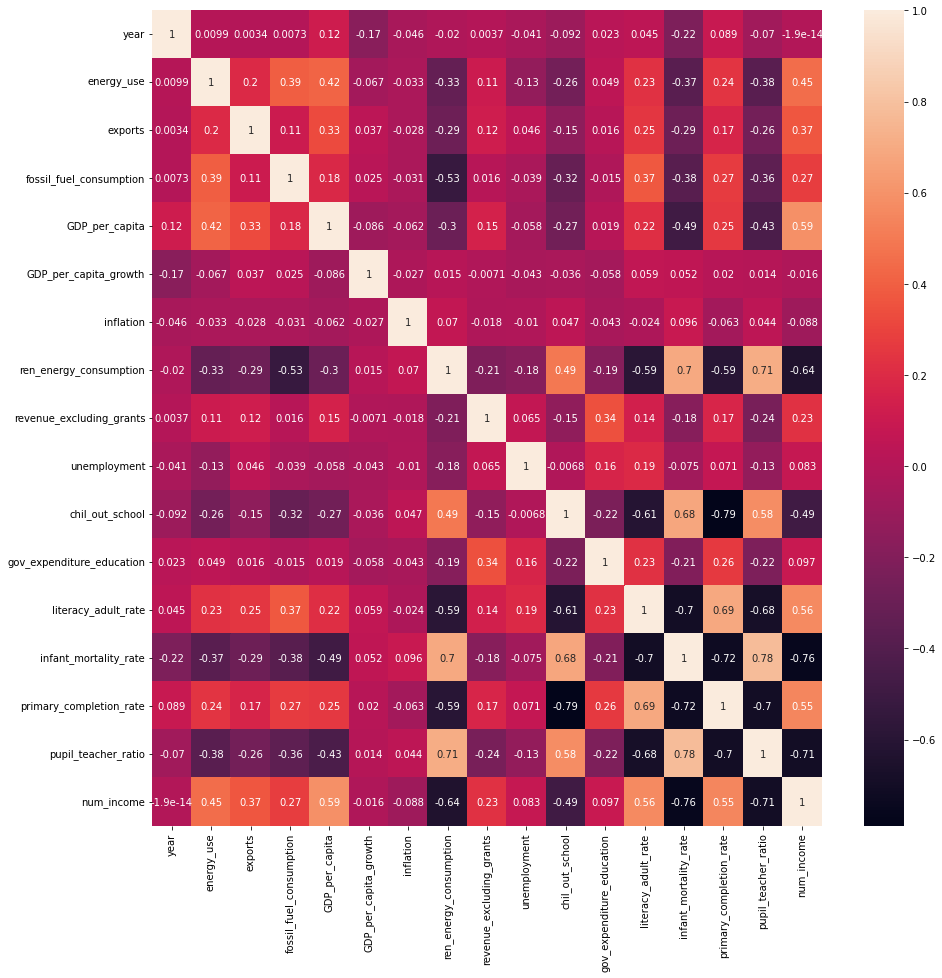

In [42]:
plt.figure(figsize=(15, 15))
sns.heatmap(Merged_Table.corr(), annot=True)

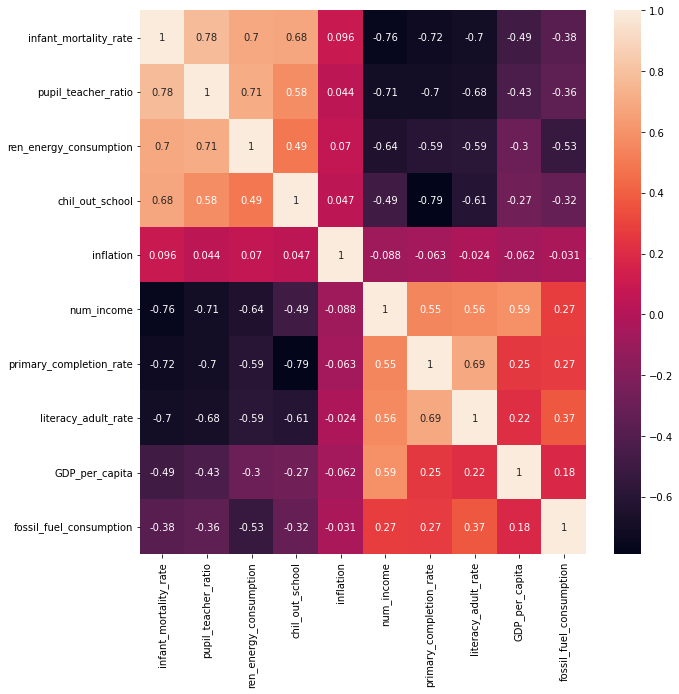

In [95]:
#Table for showing in Final Presentation.
dmt = Merged_Table[['infant_mortality_rate','pupil_teacher_ratio','ren_energy_consumption',
                   'chil_out_school','inflation','num_income','primary_completion_rate',
                   'literacy_adult_rate','GDP_per_capita','fossil_fuel_consumption']].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(dmt, annot=True)

In [44]:
# Se crea una variable llamada log_infant_mortality_rate que es simplemente el logaritmo de infant_mortality_rate para facilitar las visualizaciones
Merged_Table['log_infant_mortality_rate']= np.log(Merged_Table['infant_mortality_rate'])

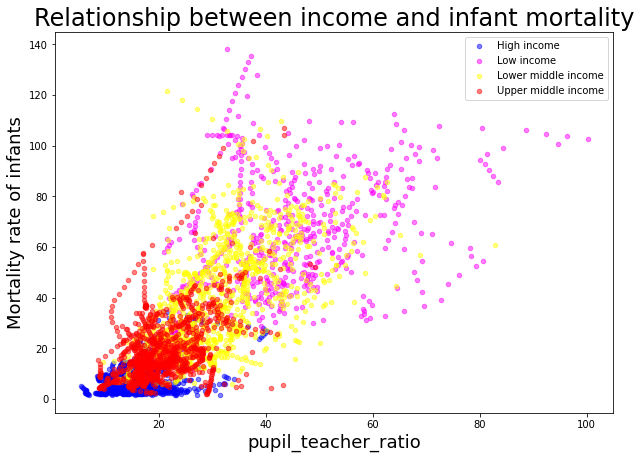

In [45]:
# Scatter plot de pupil_teacher_ratio and infant_mortality_rate
ax1 = Merged_Table[Merged_Table['income'] == 'High income'].plot(kind='scatter', x='pupil_teacher_ratio', y='infant_mortality_rate', color='blue', alpha=0.5, figsize=(10, 7))
Merged_Table[Merged_Table['income'] == 'Low income'].plot(kind='scatter', x='pupil_teacher_ratio', y='infant_mortality_rate', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
Merged_Table[Merged_Table['income'] == 'Lower middle income'].plot(kind='scatter', x='pupil_teacher_ratio', y='infant_mortality_rate', color='yellow', alpha=0.5, figsize=(10 ,7), ax=ax1)
Merged_Table[Merged_Table['income'] == 'Upper middle income'].plot(kind='scatter', x='pupil_teacher_ratio', y='infant_mortality_rate', color='red', alpha=0.5, figsize=(10 ,7), ax=ax1)

plt.legend(labels=['High income', 'Low income', 'Lower middle income' ,'Upper middle income'])
plt.title('Relationship between income and infant mortality', size=24)
plt.xlabel('pupil_teacher_ratio', size=18)
plt.ylabel('Mortality rate of infants', size=18);


In [46]:
Merged_Table.columns

Index(['region', 'income', 'country', 'year', 'energy_use', 'exports',
       'fossil_fuel_consumption', 'GDP_per_capita', 'GDP_per_capita_growth',
       'inflation', 'ren_energy_consumption', 'revenue_excluding_grants',
       'unemployment', 'chil_out_school', 'gov_expenditure_education',
       'literacy_adult_rate', 'infant_mortality_rate',
       'primary_completion_rate', 'pupil_teacher_ratio', 'num_income',
       'log_infant_mortality_rate'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

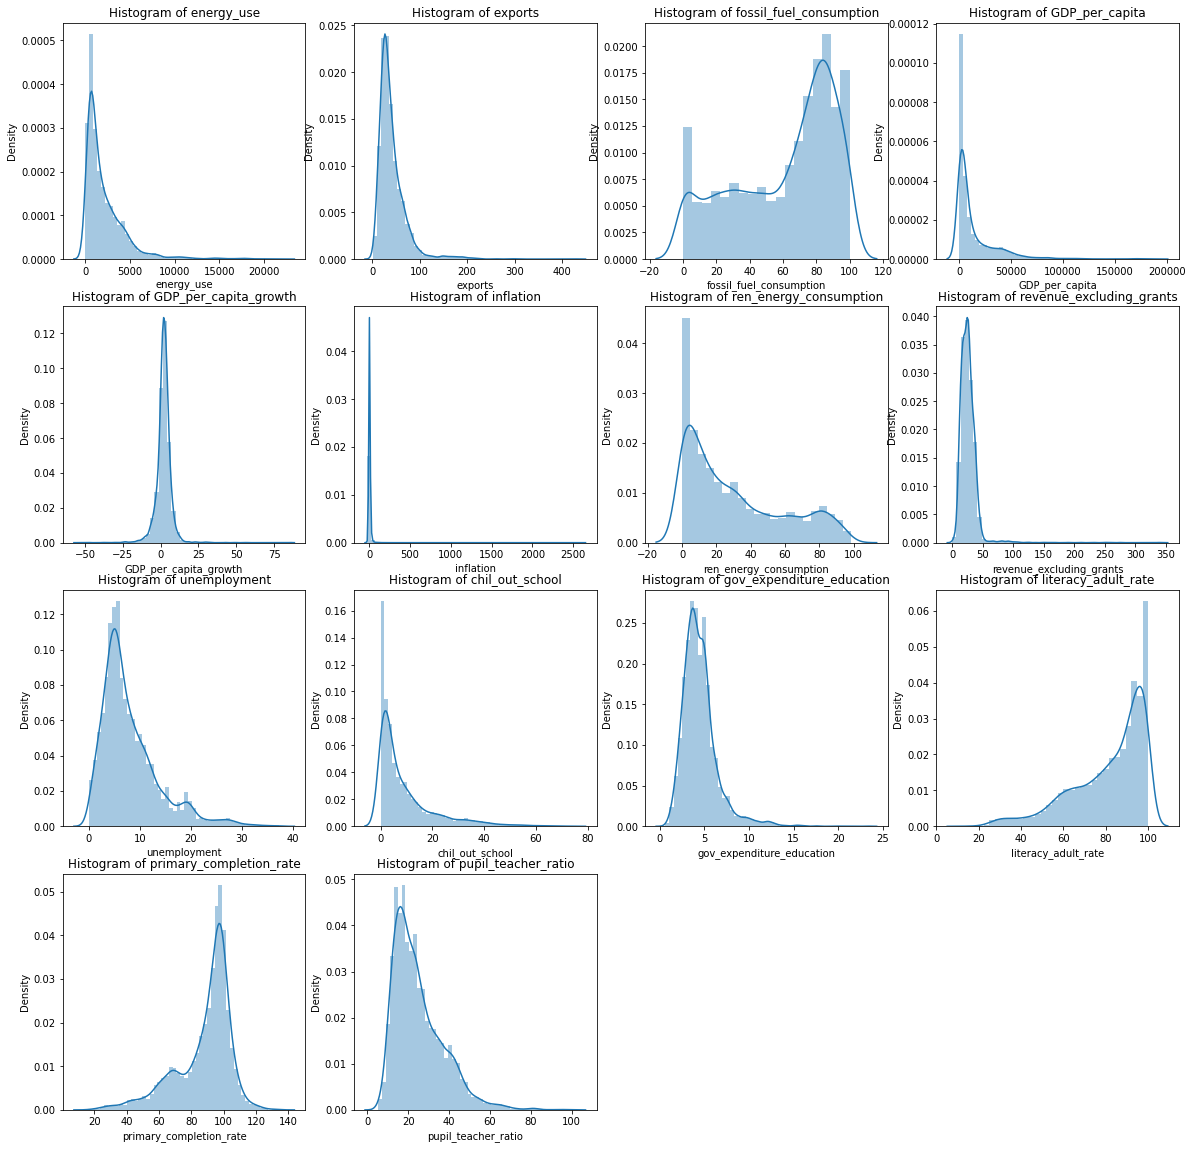

In [47]:
# Graficamos histogramas con las variables de eduaction 
variables = ['energy_use', 'exports',
       'fossil_fuel_consumption', 'GDP_per_capita', 'GDP_per_capita_growth',
       'inflation', 'ren_energy_consumption', 'revenue_excluding_grants',
       'unemployment', 'chil_out_school',
       'gov_expenditure_education', 'literacy_adult_rate',
       'primary_completion_rate', 'pupil_teacher_ratio']
plt.figure(figsize = (20,20))
for i, var in enumerate(variables,start =1):
    plt.subplot(4,4,i)
    sns.distplot(a = Merged_Table[var])
    title_string = 'Histogram of ' + var
    plt.title(title_string)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

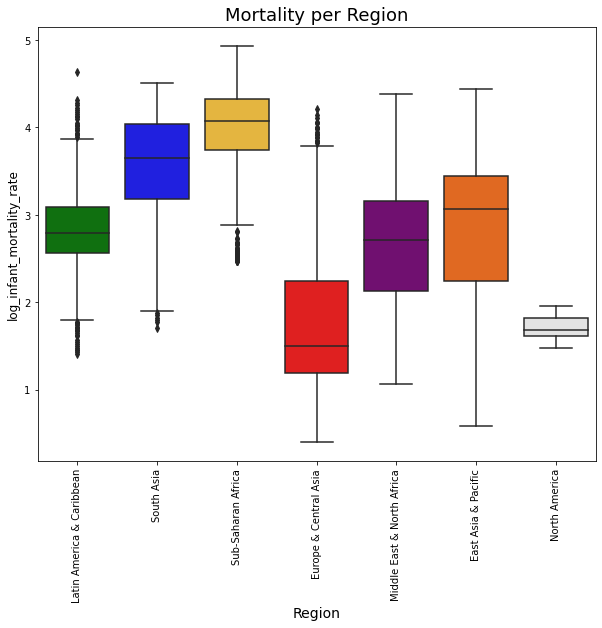

In [48]:
# Graficamos con un diagrama de cajas o bigotes para representar los grupos de datos numéricos a través de sus cuartiles
my_pal = {"Latin America & Caribbean": "g", "South Asia": "b", "Sub-Saharan Africa":"#FFC125" ,
         "Europe & Central Asia": "r", "Middle East & North Africa": "purple", "East Asia & Pacific":'#FF6103' ,
         "North America" : "#E3E3E3"}

plt.figure(figsize=(10, 8))
sns.boxplot(x="region", 
            y="log_infant_mortality_rate", 
            data=Merged_Table, palette=my_pal)
plt.ylabel("log_infant_mortality_rate", size=12)
plt.xlabel("Region", size=14)
plt.title("Mortality per Region", size=18)
plt.xticks(rotation=90)




https://datatopics.worldbank.org/world-development-indicators/the-world-by-income-and-region.html

<center><img src="https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/Screenshot%202022-09-26%20at%201.19.51%20PM.png" alt="drawing" style="width:900px;"/></denter>

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

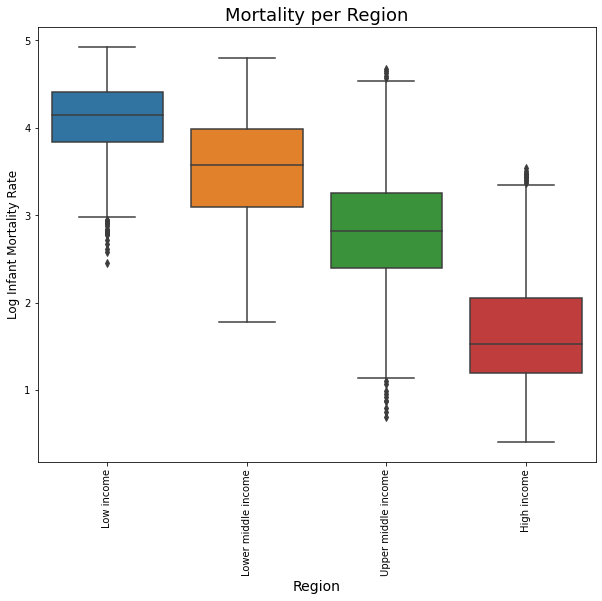

In [49]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="income", 
            y="log_infant_mortality_rate", 
            data=Merged_Table , order = ['Low income', 'Lower middle income', 'Upper middle income', 'High income'])
plt.ylabel("Log Infant Mortality Rate", size=12)
plt.xlabel("Region", size=14)
plt.title("Mortality per Region", size=18)
plt.xticks(rotation=90)




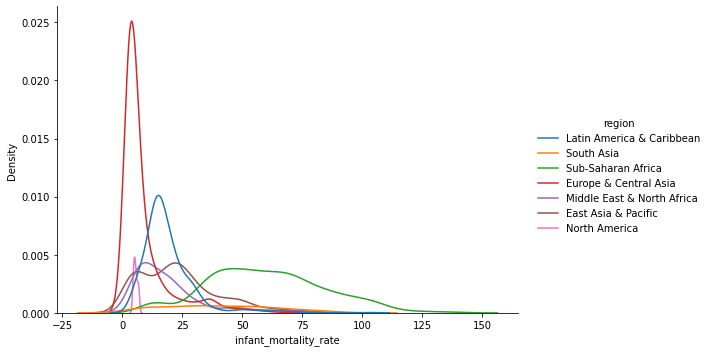

In [50]:
sns.displot(data=Merged_Table, x='infant_mortality_rate', hue='region', kind='kde', fill=False, height=5, aspect=1.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, '2000'),
 Text(0, 0, '2001'),
 Text(0, 0, '2002'),
 Text(0, 0, '2003'),
 Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '2006'),
 Text(0, 0, '2007'),
 Text(0, 0, '2008'),
 Text(0, 0, '2009'),
 Text(0, 0, '2010'),
 Text(0, 0, '2011'),
 Text(0, 0, '2012'),
 Text(0, 0, '2013'),
 Text(0, 0, '2014'),
 Text(0, 0, '2015'),
 Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019')]

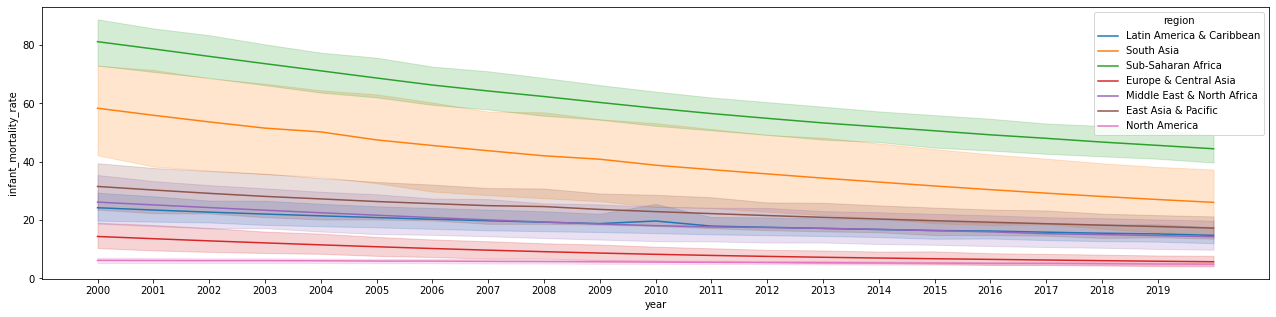

In [51]:
plt.figure(figsize=(22, 5))
g = sns.lineplot('year', 'infant_mortality_rate', hue='region', 
             data=Merged_Table)
g.set_xticks(range(2000,2020))
g.set_xticklabels(['2000','2001','2002','2003','2004','2005','2006','2007' ,'2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])

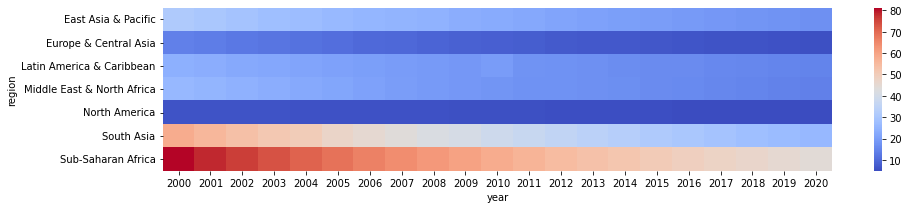

In [52]:
#generate_df = electricity_df[electricity_df["Description"] == "ENG Nuclear Electric Power"]
pivoted_df = pd.pivot_table(data=Merged_Table, index="region", columns="year", values="infant_mortality_rate")
pivoted_df.head(10)

plt.figure(figsize=(15, 3)) # We can set the size using matplotlib
sns.heatmap(pivoted_df, cmap="coolwarm") # cmap defines the color palette

# Modeling

## 1 feature

In [53]:
from sklearn.linear_model import LinearRegression

lr_Merged_Table = Merged_Table[['pupil_teacher_ratio', 'infant_mortality_rate']].dropna()

# create linear regression object
lr = LinearRegression()

# fit linear regression
lr.fit(lr_Merged_Table[['pupil_teacher_ratio']], lr_Merged_Table['infant_mortality_rate'])

# get the slope and intercept of the line best fit.
print('The slope is ' , + lr.intercept_)
# 944.9528492345776

print('The coeficients are: ' , + lr.coef_)
# [-120.31675572  215.39501027]


print('The R2 is: ', + lr.score(lr_Merged_Table[['pupil_teacher_ratio']], lr_Merged_Table[['infant_mortality_rate']]))

The slope is  -11.826002415541119
The coeficients are:  [1.60666692]
The R2 is:  0.6085417889284028


# 2 features

In [54]:
from sklearn.linear_model import LinearRegression

lr_Merged_Table = Merged_Table[['pupil_teacher_ratio', 'GDP_per_capita', 'infant_mortality_rate']].dropna()

# create linear regression object
mlr = LinearRegression()

# fit linear regression
mlr.fit(lr_Merged_Table[['pupil_teacher_ratio', 'GDP_per_capita']], lr_Merged_Table['infant_mortality_rate'])

# get the slope and intercept of the line best fit.
print('The slope is ' , + mlr.intercept_)
# 944.9528492345776

print('The coeficients are: ' , + mlr.coef_)
# [-120.31675572  215.39501027]


print('The R2 is: ', + mlr.score(lr_Merged_Table[['pupil_teacher_ratio', 'GDP_per_capita']], lr_Merged_Table[['infant_mortality_rate']]))

The slope is  -5.408653003337214
The coeficients are:  [ 1.45483243e+00 -2.14494725e-04]
The R2 is:  0.6286436434252785


# 3 features

In [55]:
from sklearn.linear_model import LinearRegression

lr_Merged_Table = Merged_Table[['pupil_teacher_ratio', 'GDP_per_capita', 'infant_mortality_rate', 'primary_completion_rate']].dropna()

# create linear regression object
mlr = LinearRegression()

# fit linear regression
mlr.fit(lr_Merged_Table[['pupil_teacher_ratio', 'GDP_per_capita', 'primary_completion_rate']], lr_Merged_Table['infant_mortality_rate'])

# get the slope and intercept of the line best fit.
print('The slope is ' , + mlr.intercept_)
# 944.9528492345776

print('The coeficients are: ' , + mlr.coef_)
# [-120.31675572  215.39501027]


print('The R2 is: ', + mlr.score(lr_Merged_Table[['pupil_teacher_ratio', 'GDP_per_capita', 'primary_completion_rate']], lr_Merged_Table[['infant_mortality_rate']]))

The slope is  55.20930248635699
The coeficients are:  [ 9.06928281e-01 -2.41360495e-04 -5.29420827e-01]
The R2 is:  0.6943161109697993


# 4 features

In [56]:
from sklearn.linear_model import LinearRegression

lr_Merged_Table = Merged_Table[['pupil_teacher_ratio', 'GDP_per_capita', 'infant_mortality_rate', 'literacy_adult_rate', 'primary_completion_rate']].dropna()

# create linear regression object
mlr = LinearRegression()

# fit linear regression
mlr.fit(lr_Merged_Table[['pupil_teacher_ratio', 'GDP_per_capita', 'primary_completion_rate', 'literacy_adult_rate']], lr_Merged_Table['infant_mortality_rate'])

# get the slope and intercept of the line best fit.
print('The slope is ' , + mlr.intercept_)
# 944.9528492345776

print('The coeficients are: ' , + mlr.coef_)
# [-120.31675572  215.39501027]


print('The R2 is: ', + mlr.score(lr_Merged_Table[['pupil_teacher_ratio', 'GDP_per_capita' , 'literacy_adult_rate' ,'primary_completion_rate']], lr_Merged_Table[['infant_mortality_rate']]))

The slope is  75.66663066914043
The coeficients are:  [ 7.04731499e-01 -2.59438509e-04 -3.96202641e-01 -3.30448502e-01]
The R2 is:  0.7151342526982285


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


# 5 features

In [57]:
from sklearn.linear_model import LinearRegression

lr_Merged_Table = Merged_Table[['pupil_teacher_ratio', 'num_income','GDP_per_capita', 'infant_mortality_rate', 'literacy_adult_rate', 'primary_completion_rate']].dropna()

# create linear regression object
mlr = LinearRegression()

# fit linear regression
mlr.fit(lr_Merged_Table[['pupil_teacher_ratio', 'num_income', 'GDP_per_capita', 'primary_completion_rate', 'literacy_adult_rate']], lr_Merged_Table['infant_mortality_rate'])

# get the slope and intercept of the line best fit.
print('The slope is ' , + mlr.intercept_)
# 944.9528492345776

print('The coeficients are: ' , + mlr.coef_)
# [-120.31675572  215.39501027]


print('The R2 is: ', + mlr.score(lr_Merged_Table[['pupil_teacher_ratio', 'num_income', 'GDP_per_capita' , 'literacy_adult_rate' ,'primary_completion_rate']], lr_Merged_Table[['infant_mortality_rate']]))

The slope is  86.78249445817603
The coeficients are:  [ 4.58753120e-01 -7.09117063e+00 -1.06737259e-04 -3.38301836e-01
 -2.47474895e-01]
The R2 is:  0.725694694231364


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


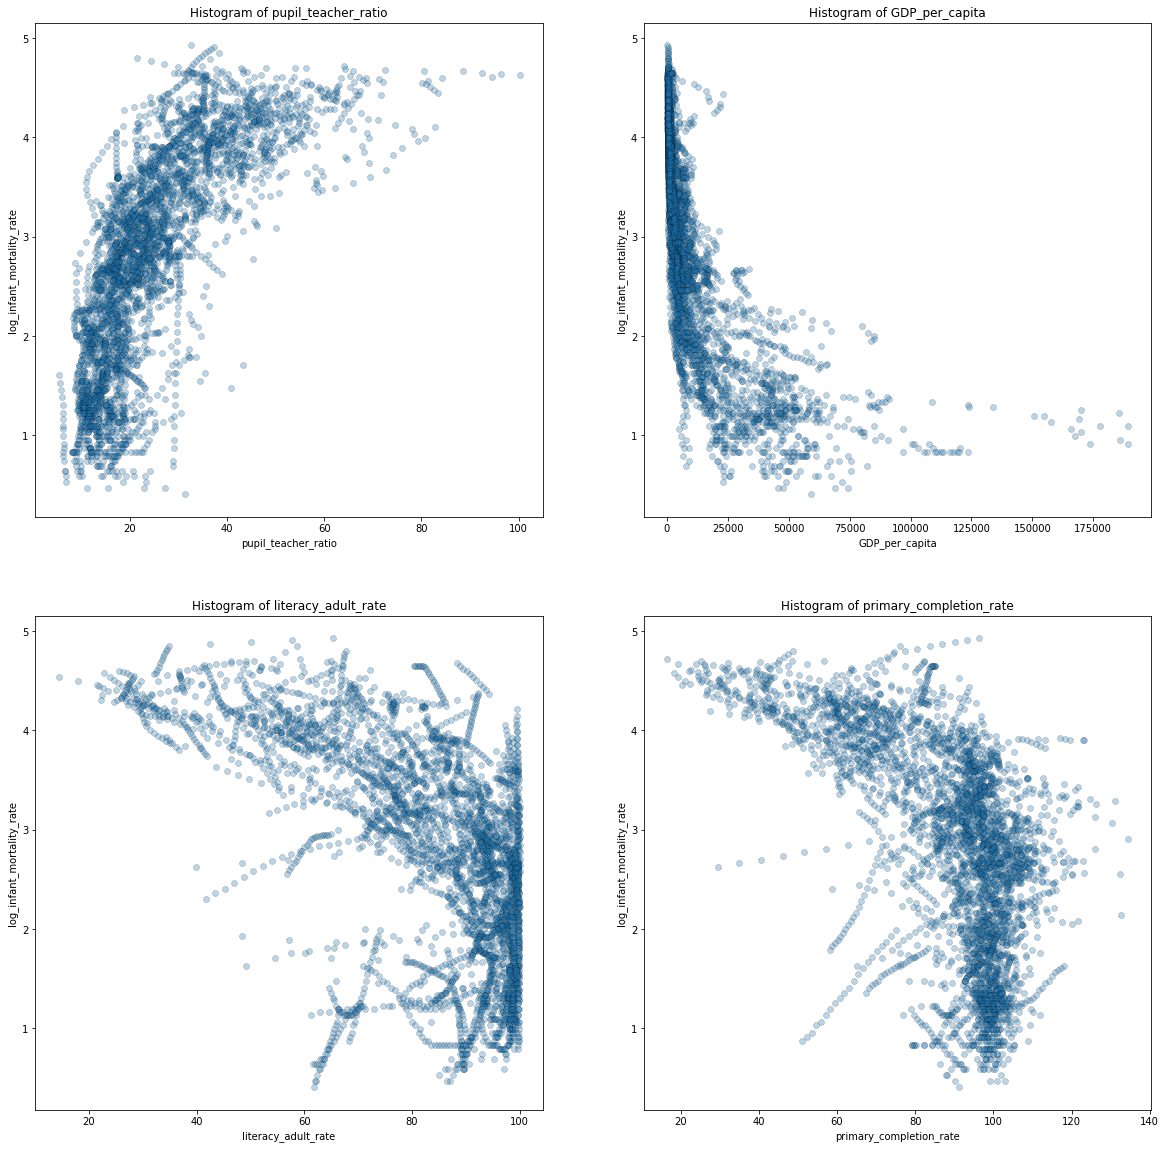

In [58]:
lr_Merged_Table = Merged_Table[['pupil_teacher_ratio', 'num_income','GDP_per_capita', 'log_infant_mortality_rate', 'literacy_adult_rate', 'primary_completion_rate']].dropna()

variables = ['pupil_teacher_ratio','GDP_per_capita', 'literacy_adult_rate', 'primary_completion_rate']

plt.figure(figsize = (20,20))
for i, var in enumerate(variables,start =1):
    plt.subplot(2,2,i)
    sns.scatterplot(data=  lr_Merged_Table , x = var , y =lr_Merged_Table['log_infant_mortality_rate'] , alpha=0.3, edgecolor="black") 
    title_string = 'Histogram of ' + var
    plt.title(title_string)



# linear model with `statsmodels` library

In [59]:

import statsmodels.formula.api as sm 
formula1 = 'infant_mortality_rate ~ pupil_teacher_ratio'
model1 = sm.ols(formula = formula1, data = Merged_Table)
fitted1 = model1.fit()
print(fitted1.summary())

                              OLS Regression Results                             
Dep. Variable:     infant_mortality_rate   R-squared:                       0.609
Model:                               OLS   Adj. R-squared:                  0.608
Method:                    Least Squares   F-statistic:                     7594.
Date:                   Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                           01:07:32   Log-Likelihood:                -20489.
No. Observations:                   4887   AIC:                         4.098e+04
Df Residuals:                       4885   BIC:                         4.099e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Inte

# con 2 variables de entrada

In [60]:
formula1 = 'infant_mortality_rate ~ pupil_teacher_ratio + income'
model1 = sm.ols(formula = formula1, data = Merged_Table)
fitted1 = model1.fit()
print(fitted1.summary())

                              OLS Regression Results                             
Dep. Variable:     infant_mortality_rate   R-squared:                       0.671
Model:                               OLS   Adj. R-squared:                  0.671
Method:                    Least Squares   F-statistic:                     2021.
Date:                   Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                           01:07:32   Log-Likelihood:                -16290.
No. Observations:                   3963   AIC:                         3.259e+04
Df Residuals:                       3958   BIC:                         3.262e+04
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

# Con 3 variables de entrada

In [61]:
formula1 = 'infant_mortality_rate ~ pupil_teacher_ratio + income + primary_completion_rate '
model1 = sm.ols(formula = formula1, data = Merged_Table)
fitted1 = model1.fit()
print(fitted1.summary())

                              OLS Regression Results                             
Dep. Variable:     infant_mortality_rate   R-squared:                       0.713
Model:                               OLS   Adj. R-squared:                  0.713
Method:                    Least Squares   F-statistic:                     1964.
Date:                   Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                           01:07:32   Log-Likelihood:                -15975.
No. Observations:                   3953   AIC:                         3.196e+04
Df Residuals:                       3947   BIC:                         3.200e+04
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

# Con 4 o mas variables de entrada

In [62]:

formula1 = 'infant_mortality_rate ~ pupil_teacher_ratio + primary_completion_rate + ren_energy_consumption + region + income'
model1 = sm.ols(formula = formula1, data = Merged_Table)
fitted1 = model1.fit()
print(fitted1.summary())

                              OLS Regression Results                             
Dep. Variable:     infant_mortality_rate   R-squared:                       0.757
Model:                               OLS   Adj. R-squared:                  0.756
Method:                    Least Squares   F-statistic:                     1022.
Date:                   Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                           01:07:32   Log-Likelihood:                -15649.
No. Observations:                   3953   AIC:                         3.132e+04
Df Residuals:                       3940   BIC:                         3.141e+04
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [63]:
#Calculo regresion lineal tasa de mortalidad infantil vs region + income  // presenta un R2 de 0.695 // los p-value de las regiones Latin America y North America son mayores a 0.05
formula1 = 'infant_mortality_rate ~ region + income'
model1 = sm.ols(formula = formula1, data = Merged_Table)
fitted1 = model1.fit()
print(fitted1.summary())

                              OLS Regression Results                             
Dep. Variable:     infant_mortality_rate   R-squared:                       0.695
Model:                               OLS   Adj. R-squared:                  0.694
Method:                    Least Squares   F-statistic:                     1002.
Date:                   Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                           01:07:32   Log-Likelihood:                -16179.
No. Observations:                   3969   AIC:                         3.238e+04
Df Residuals:                       3959   BIC:                         3.244e+04
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

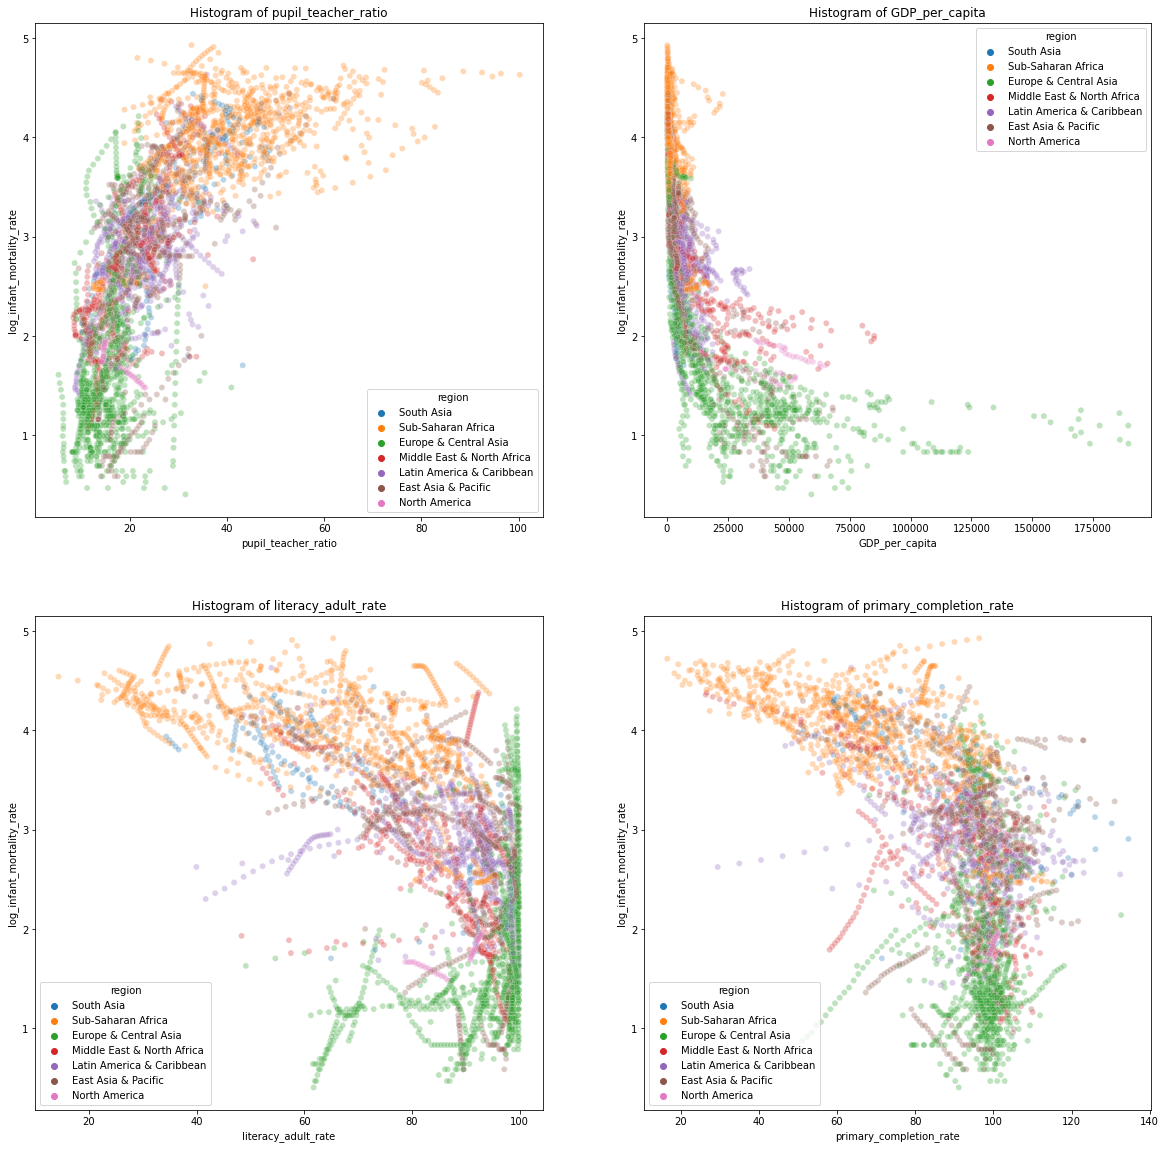

In [64]:
lr_Merged_Table = Merged_Table[['pupil_teacher_ratio', 'num_income','GDP_per_capita', 'log_infant_mortality_rate', 'literacy_adult_rate', 'primary_completion_rate', 'region' ]].dropna()

variables = ['pupil_teacher_ratio','GDP_per_capita', 'literacy_adult_rate', 'primary_completion_rate']

plt.figure(figsize = (20,20))
for i, var in enumerate(variables,start =1):
    plt.subplot(2,2,i)
    sns.scatterplot(data=  lr_Merged_Table , x = var , y =lr_Merged_Table['log_infant_mortality_rate'] , alpha=0.3, hue='region') 
    title_string = 'Histogram of ' + var
    plt.title(title_string)

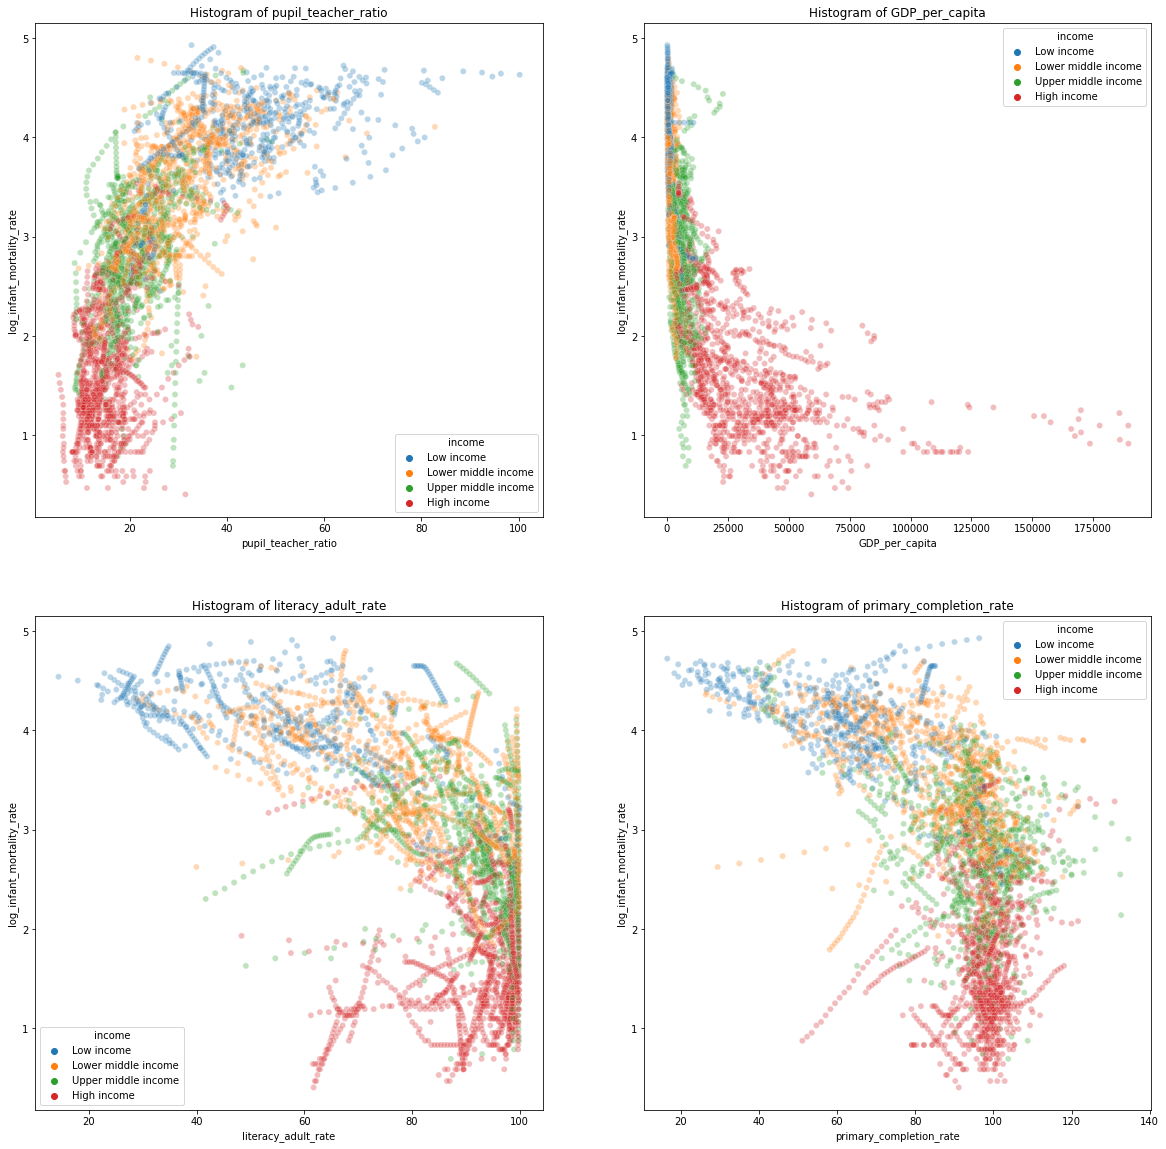

In [65]:
lr_Merged_Table = Merged_Table[['pupil_teacher_ratio', 'num_income','GDP_per_capita', 'log_infant_mortality_rate', 'literacy_adult_rate', 'primary_completion_rate', 'region', 'income' ]].dropna()

variables = ['pupil_teacher_ratio','GDP_per_capita', 'literacy_adult_rate', 'primary_completion_rate']

plt.figure(figsize = (20,20))
for i, var in enumerate(variables,start =1):
    plt.subplot(2,2,i)
    sns.scatterplot(data=  lr_Merged_Table , x = var , y =lr_Merged_Table['log_infant_mortality_rate'] , alpha=0.3, hue='income') 
    title_string = 'Histogram of ' + var
    plt.title(title_string)

In [66]:
Merged_Table.columns

Index(['region', 'income', 'country', 'year', 'energy_use', 'exports',
       'fossil_fuel_consumption', 'GDP_per_capita', 'GDP_per_capita_growth',
       'inflation', 'ren_energy_consumption', 'revenue_excluding_grants',
       'unemployment', 'chil_out_school', 'gov_expenditure_education',
       'literacy_adult_rate', 'infant_mortality_rate',
       'primary_completion_rate', 'pupil_teacher_ratio', 'num_income',
       'log_infant_mortality_rate'],
      dtype='object')

In [67]:
Merged_Table['region'].drop_duplicates()

0       Latin America & Caribbean
22                            NaN
44                     South Asia
88             Sub-Saharan Africa
110         Europe & Central Asia
176    Middle East & North Africa
242           East Asia & Pacific
594                 North America
Name: region, dtype: object

In [68]:
#Armando dataframes para calcular regresion lineal por INCOME
lr_high = Merged_Table[Merged_Table['income']=='High income']
lr_low = Merged_Table[Merged_Table['income']=='Low income']
lr_lower_middle = Merged_Table[Merged_Table['income']=='Lower middle income']
lr_upper_middle = Merged_Table[Merged_Table['income']=='Upper middle income']

**Calculo regresiones lineales por INCOME**

In [69]:
#Regresion lineal income = High
formula1 = 'infant_mortality_rate ~ pupil_teacher_ratio + primary_completion_rate + ren_energy_consumption + GDP_per_capita + inflation'
model1 = sm.ols(formula = formula1, data = lr_high)
fitted1 = model1.fit()
print(fitted1.summary())

                              OLS Regression Results                             
Dep. Variable:     infant_mortality_rate   R-squared:                       0.353
Model:                               OLS   Adj. R-squared:                  0.350
Method:                    Least Squares   F-statistic:                     132.3
Date:                   Wed, 19 Oct 2022   Prob (F-statistic):          5.67e-112
Time:                           01:07:37   Log-Likelihood:                -3466.8
No. Observations:                   1218   AIC:                             6946.
Df Residuals:                       1212   BIC:                             6976.
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [70]:
#Regresion lineal income = Low
formula1 = 'infant_mortality_rate ~ pupil_teacher_ratio + primary_completion_rate + ren_energy_consumption + GDP_per_capita + inflation'
model1 = sm.ols(formula = formula1, data = lr_low)
fitted1 = model1.fit()
print(fitted1.summary())

                              OLS Regression Results                             
Dep. Variable:     infant_mortality_rate   R-squared:                       0.375
Model:                               OLS   Adj. R-squared:                  0.369
Method:                    Least Squares   F-statistic:                     67.82
Date:                   Wed, 19 Oct 2022   Prob (F-statistic):           1.68e-55
Time:                           01:07:37   Log-Likelihood:                -2511.9
No. Observations:                    572   AIC:                             5036.
Df Residuals:                        566   BIC:                             5062.
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [71]:
#Regresion lineal income = Lower_middle
formula1 = 'infant_mortality_rate ~ pupil_teacher_ratio + primary_completion_rate + ren_energy_consumption + GDP_per_capita + inflation'
model1 = sm.ols(formula = formula1, data = lr_lower_middle)
fitted1 = model1.fit()
print(fitted1.summary())

                              OLS Regression Results                             
Dep. Variable:     infant_mortality_rate   R-squared:                       0.576
Model:                               OLS   Adj. R-squared:                  0.574
Method:                    Least Squares   F-statistic:                     295.0
Date:                   Wed, 19 Oct 2022   Prob (F-statistic):          2.01e-199
Time:                           01:07:37   Log-Likelihood:                -4427.0
No. Observations:                   1092   AIC:                             8866.
Df Residuals:                       1086   BIC:                             8896.
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [72]:
#Regresion lineal income = Upper_middle
formula1 = 'infant_mortality_rate ~ pupil_teacher_ratio + primary_completion_rate + ren_energy_consumption + GDP_per_capita + inflation'
model1 = sm.ols(formula = formula1, data = lr_upper_middle)
fitted1 = model1.fit()
print(fitted1.summary())

                              OLS Regression Results                             
Dep. Variable:     infant_mortality_rate   R-squared:                       0.348
Model:                               OLS   Adj. R-squared:                  0.345
Method:                    Least Squares   F-statistic:                     113.7
Date:                   Wed, 19 Oct 2022   Prob (F-statistic):           2.21e-96
Time:                           01:07:37   Log-Likelihood:                -4108.5
No. Observations:                   1071   AIC:                             8229.
Df Residuals:                       1065   BIC:                             8259.
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

**Calculo regresiones lineales por REGION** 

In [73]:
#Armando dataframes para calcular regresion lineal por REGION
lr_latin_america_caribbean = Merged_Table[Merged_Table['region']=='Latin America & Caribbean']
lr_south_asia = Merged_Table[Merged_Table['region']=='South Asia']
lr_sub_sahara_africa = Merged_Table[Merged_Table['region']=='Sub-Saharan Africa']
lr_europe_centralasia = Merged_Table[Merged_Table['region']=='Europe & Central Asia']
lr_middle_east_north_africa= Merged_Table[Merged_Table['region']=='Middle East & North Africa']
lr_east_asia_pacific = Merged_Table[Merged_Table['region']=='East Asia & Pacific']
lr_north_america = Merged_Table[Merged_Table['region']=='North America']

In [74]:
#Regresion lineal region = Latin America & Caribbean
formula1 = 'infant_mortality_rate ~ pupil_teacher_ratio + primary_completion_rate + ren_energy_consumption + GDP_per_capita'
model1 = sm.ols(formula = formula1, data = lr_latin_america_caribbean)
fitted1 = model1.fit()
print(fitted1.summary())

                              OLS Regression Results                             
Dep. Variable:     infant_mortality_rate   R-squared:                       0.355
Model:                               OLS   Adj. R-squared:                  0.351
Method:                    Least Squares   F-statistic:                     94.59
Date:                   Wed, 19 Oct 2022   Prob (F-statistic):           4.18e-64
Time:                           01:07:37   Log-Likelihood:                -2484.7
No. Observations:                    693   AIC:                             4979.
Df Residuals:                        688   BIC:                             5002.
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [75]:
#Regresion lineal region = South Asia
formula1 = 'infant_mortality_rate ~ pupil_teacher_ratio + primary_completion_rate + ren_energy_consumption + GDP_per_capita'
model1 = sm.ols(formula = formula1, data = lr_south_asia)
fitted1 = model1.fit()
print(fitted1.summary())

                              OLS Regression Results                             
Dep. Variable:     infant_mortality_rate   R-squared:                       0.690
Model:                               OLS   Adj. R-squared:                  0.681
Method:                    Least Squares   F-statistic:                     81.63
Date:                   Wed, 19 Oct 2022   Prob (F-statistic):           2.36e-36
Time:                           01:07:37   Log-Likelihood:                -586.37
No. Observations:                    152   AIC:                             1183.
Df Residuals:                        147   BIC:                             1198.
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [76]:
#Regresion lineal region = Sub-Saharan Africa
formula1 = 'infant_mortality_rate ~ pupil_teacher_ratio + primary_completion_rate + ren_energy_consumption + GDP_per_capita'
model1 = sm.ols(formula = formula1, data = lr_sub_sahara_africa)
fitted1 = model1.fit()
print(fitted1.summary())

                              OLS Regression Results                             
Dep. Variable:     infant_mortality_rate   R-squared:                       0.428
Model:                               OLS   Adj. R-squared:                  0.426
Method:                    Least Squares   F-statistic:                     179.8
Date:                   Wed, 19 Oct 2022   Prob (F-statistic):          5.64e-115
Time:                           01:07:37   Log-Likelihood:                -4178.0
No. Observations:                    966   AIC:                             8366.
Df Residuals:                        961   BIC:                             8390.
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [77]:
#Regresion lineal region = Europe & Central Asia
formula1 = 'infant_mortality_rate ~ pupil_teacher_ratio + primary_completion_rate + ren_energy_consumption + GDP_per_capita'
model1 = sm.ols(formula = formula1, data = lr_europe_centralasia)
fitted1 = model1.fit()
print(fitted1.summary())

                              OLS Regression Results                             
Dep. Variable:     infant_mortality_rate   R-squared:                       0.226
Model:                               OLS   Adj. R-squared:                  0.223
Method:                    Least Squares   F-statistic:                     76.38
Date:                   Wed, 19 Oct 2022   Prob (F-statistic):           7.50e-57
Time:                           01:07:37   Log-Likelihood:                -3822.4
No. Observations:                   1050   AIC:                             7655.
Df Residuals:                       1045   BIC:                             7680.
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [78]:
#Regresion lineal region = Middle East & North Africa
formula1 = 'infant_mortality_rate ~ pupil_teacher_ratio + primary_completion_rate + ren_energy_consumption + GDP_per_capita'
model1 = sm.ols(formula = formula1, data = lr_middle_east_north_africa)
fitted1 = model1.fit()
print(fitted1.summary())

                              OLS Regression Results                             
Dep. Variable:     infant_mortality_rate   R-squared:                       0.739
Model:                               OLS   Adj. R-squared:                  0.737
Method:                    Least Squares   F-statistic:                     309.3
Date:                   Wed, 19 Oct 2022   Prob (F-statistic):          7.78e-126
Time:                           01:07:37   Log-Likelihood:                -1525.3
No. Observations:                    441   AIC:                             3061.
Df Residuals:                        436   BIC:                             3081.
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [79]:
#Regresion lineal region = East Asia & Pacific
formula1 = 'infant_mortality_rate ~ pupil_teacher_ratio + primary_completion_rate + ren_energy_consumption + GDP_per_capita'
model1 = sm.ols(formula = formula1, data = lr_east_asia_pacific)
fitted1 = model1.fit()
print(fitted1.summary())

                              OLS Regression Results                             
Dep. Variable:     infant_mortality_rate   R-squared:                       0.613
Model:                               OLS   Adj. R-squared:                  0.610
Method:                    Least Squares   F-statistic:                     247.4
Date:                   Wed, 19 Oct 2022   Prob (F-statistic):          2.98e-127
Time:                           01:07:37   Log-Likelihood:                -2362.4
No. Observations:                    630   AIC:                             4735.
Df Residuals:                        625   BIC:                             4757.
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [80]:
#Regresion lineal region = North America
formula1 = 'infant_mortality_rate ~ pupil_teacher_ratio + primary_completion_rate + ren_energy_consumption + GDP_per_capita' 
model1 = sm.ols(formula = formula1, data = lr_north_america)
fitted1 = model1.fit()
print(fitted1.summary())

## las variables independiente que mas se ajusta al modelo es ren_energy_consumption

                              OLS Regression Results                             
Dep. Variable:     infant_mortality_rate   R-squared:                       0.951
Model:                               OLS   Adj. R-squared:                  0.945
Method:                    Least Squares   F-statistic:                     178.4
Date:                   Wed, 19 Oct 2022   Prob (F-statistic):           1.22e-23
Time:                           01:07:37   Log-Likelihood:                 13.407
No. Observations:                     42   AIC:                            -16.81
Df Residuals:                         37   BIC:                            -8.125
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [81]:
lr_north_america['country']

594           Bermuda
595           Bermuda
596           Bermuda
597           Bermuda
598           Bermuda
            ...      
5319    United States
5320    United States
5321    United States
5322    United States
5323    United States
Name: country, Length: 66, dtype: object

In [82]:
lr_north_america.columns

Index(['region', 'income', 'country', 'year', 'energy_use', 'exports',
       'fossil_fuel_consumption', 'GDP_per_capita', 'GDP_per_capita_growth',
       'inflation', 'ren_energy_consumption', 'revenue_excluding_grants',
       'unemployment', 'chil_out_school', 'gov_expenditure_education',
       'literacy_adult_rate', 'infant_mortality_rate',
       'primary_completion_rate', 'pupil_teacher_ratio', 'num_income',
       'log_infant_mortality_rate'],
      dtype='object')

In [83]:
#Merged_Table.to_csv('data_mortality.csv')